In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"

# Load data

In [2]:
# Read in the data
adata = sc.read(folder_path + 'adata_annotated.h5ad')
# model = scvi.model.SCVI.load(folder_path + "model/", adata)

In [48]:
adata.obs.head(3)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,age,gender,tumor_grade,treatment,responsiveness
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,17,0.013015,Monocytic cells,46,Male,4,ND,NaN
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,5,0.013015,Microglia,46,Male,4,ND,NaN
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,4,0.013015,T cells,46,Male,4,ND,NaN


In [51]:
adata.obs['treatment_2'] = adata.obs['treatment']

def update_treatment_2(row):
    if row['responsiveness'] == 'Non-responder':
        return 'Non-res'
    elif row['responsiveness'] == 'Responder':
        return 'Res'
    else:
        return row['treatment']

adata.obs['treatment_2'] = adata.obs.apply(update_treatment_2, axis=1)

In [52]:
adata.obs.head(3)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,age,gender,tumor_grade,treatment,responsiveness,treatment_2
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,17,0.013015,Monocytic cells,46,Male,4,ND,NaN,ND
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,5,0.013015,Microglia,46,Male,4,ND,NaN,ND
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,4,0.013015,T cells,46,Male,4,ND,NaN,ND


In [279]:
adata.write_h5ad(folder_path + 'adata_annotated.h5ad')

---

# UMAP

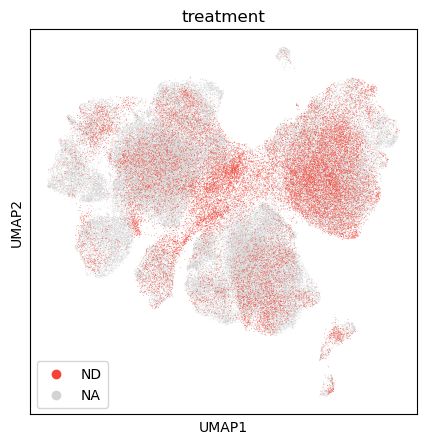

In [42]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['treatment'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'lower left',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['ND'],
    palette = ['#f44336'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

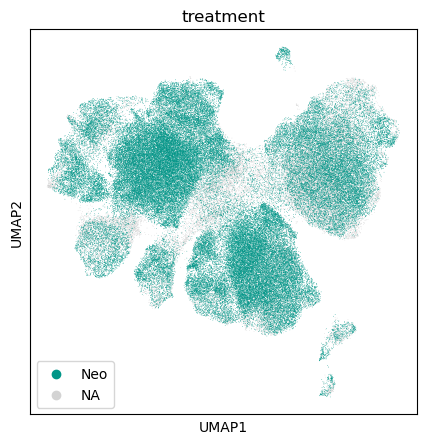

In [45]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['treatment'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Neo'],
    palette = ['#009688'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

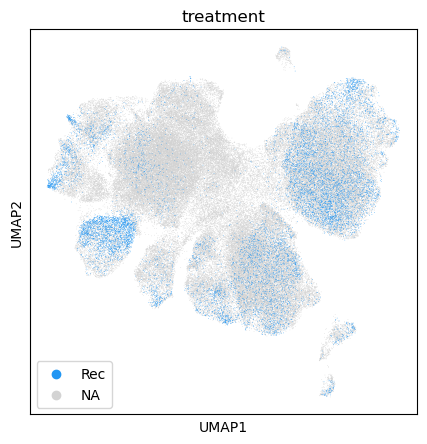

In [46]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['treatment'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Rec'],
    palette = ['#2196f3'],
    show = False,
)

plt.legend(loc = 'lower left')
plt.show()

---

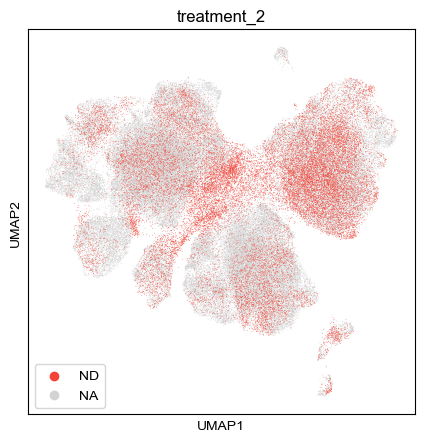

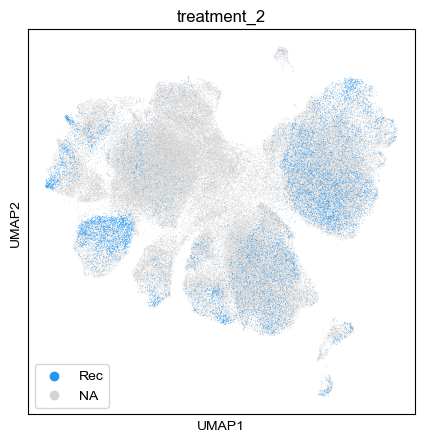

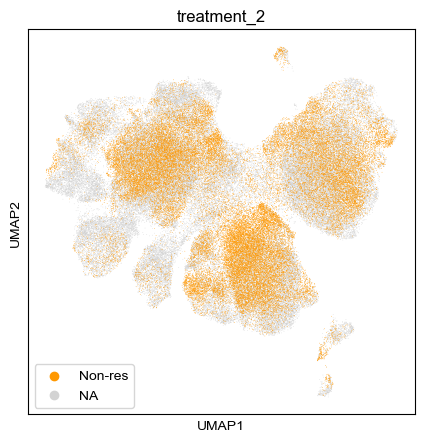

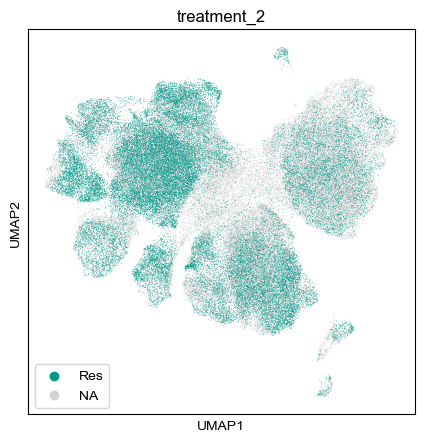

In [247]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['treatment_2'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['ND'],
    palette = ['#f44336'],
    show = False,
)
plt.legend(loc = 'lower left')

sc.pl.umap(
    adata,
    color = ['treatment_2'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Rec'],
    palette = ['#2196f3'],
    show = False,
)
plt.legend(loc = 'lower left')

sc.pl.umap(
    adata,
    color = ['treatment_2'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Non-res'],
    palette = ['#ff9800'],
    show = False,
)
plt.legend(loc = 'lower left')

sc.pl.umap(
    adata,
    color = ['treatment_2'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Res'],
    palette = ['#009688'],
    show = False,
)
plt.legend(loc = 'lower left')



plt.show()

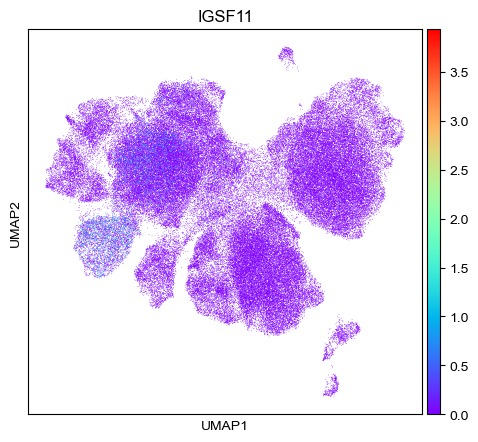

In [268]:
rcParams['figure.figsize'] = (5.6, 5)
sc.pl.umap(
    adata,
    color = ['IGSF11'],
    color_map = 'rainbow',
)

plt.show()

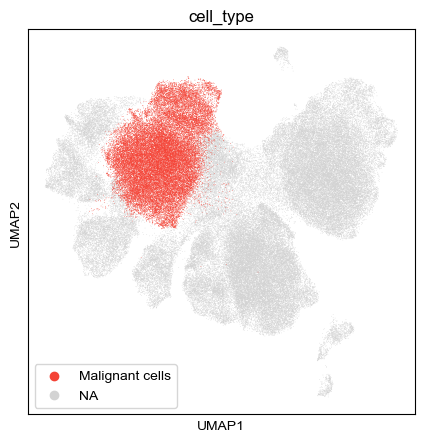

In [278]:
# rcParams['figure.figsize'] = (5.6, 5)
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # color_map = 'bwr',
    groups = ['Malignant cells'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

---
# Violin Plot

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


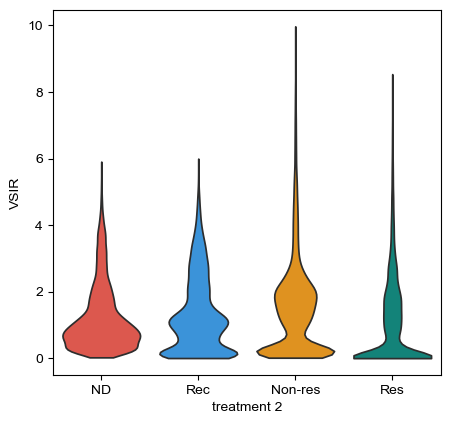

In [248]:
sc.pl.violin(
    adata,
    keys = ['VSIR'],
    groupby = 'treatment_2',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3', '#ff9800', '#009688'],
    order = ['ND', 'Rec', 'Non-res', 'Res'],
    
)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


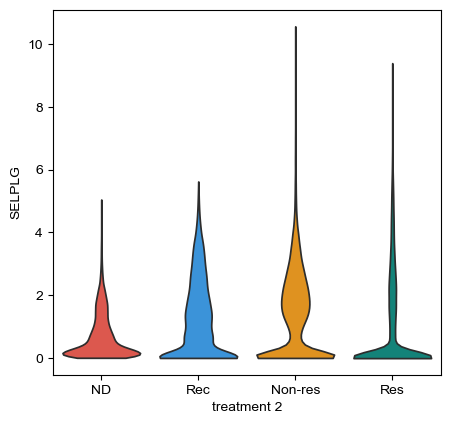

In [249]:
sc.pl.violin(
    adata,
    # keys = ['VSIR'],
    keys = ['SELPLG'],
    groupby = 'treatment_2',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3', '#ff9800', '#009688'],
    order = ['ND', 'Rec', 'Non-res', 'Res'],
    
)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


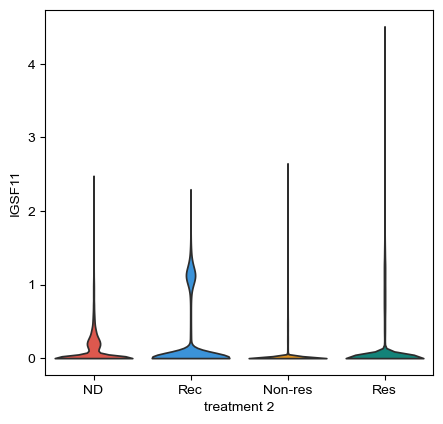

In [250]:
sc.pl.violin(
    adata,
    keys = ['IGSF11'],
    groupby = 'treatment_2',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3', '#ff9800', '#009688'],
    order = ['ND', 'Rec', 'Non-res', 'Res'],
    
)

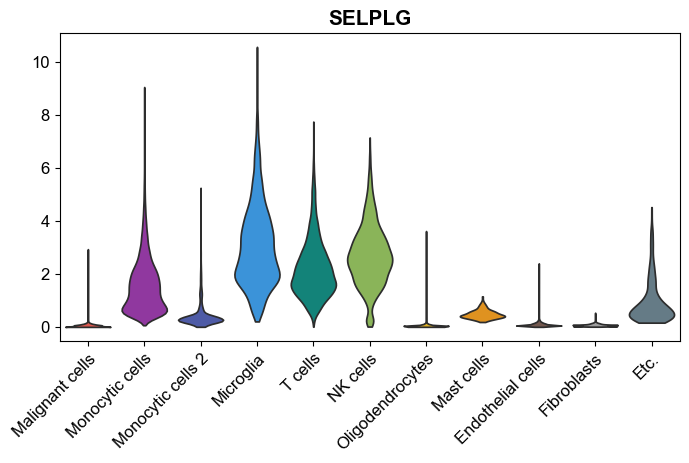

In [237]:
fig, ax = plt.subplots(figsize = (8, 4))
gene = 'SELPLG'

sc.pl.violin(
    adata,
    keys = gene,
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False,
    
)

plt.rcParams['font.family'] = 'Arial'
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize = 12)   # x 축 레이블 회전
plt.yticks(fontsize = 12)
plt.title(gene, fontweight = 'bold', fontsize = 15)
# plt.ylabel('VSIR', fontsize = 12, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

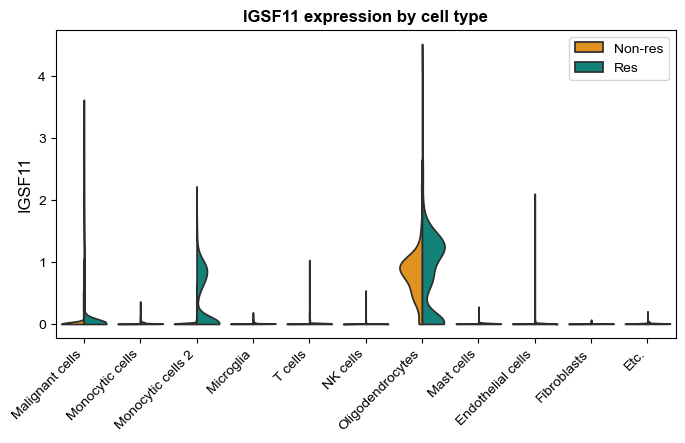

In [252]:
gene_name = 'IGSF11'

# scvi_normalized에서 gene expression data 추출
if gene_name in adata.var_names:
    gene_idx = adata.var_names.get_loc(gene_name)
    gene_expression = adata.layers['scvi_normalized'][:, gene_idx]

df = pd.DataFrame({
    'cell_type': adata.obs['cell_type'],
    'hue': adata.obs['treatment_2'],
    gene_name: gene_expression
})

df = df[df['hue'].isin(['Res', 'Non-res'])]
df['hue'] = df['hue'].cat.remove_unused_categories()

# 바이올린 플롯 그리기
plt.figure(figsize=(8, 4))
sns.violinplot(
    data = df,
    x = 'cell_type',
    y = gene_name,
    hue = 'hue',
    split = True,
    inner = None,
    cut = 0,
    density_norm = 'width',
    palette = ['#ff9800', '#009688'],
)

# 그래프 꾸미기
plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title = None)
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
plt.show()


---
# Box plot

C:\Users\heung\AppData\Local\Temp\ipykernel_54296\2999857304.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


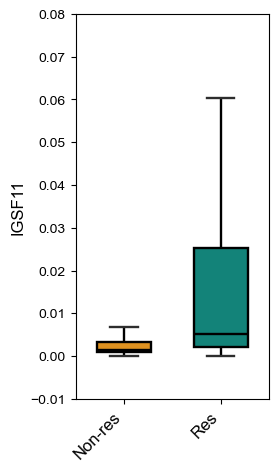

In [258]:
gene_name = 'IGSF11'

# scvi_normalized에서 gene expression data 추출
if gene_name in adata.var_names:
    gene_idx = adata.var_names.get_loc(gene_name)
    gene_expression = adata.layers['scvi_normalized'][:, gene_idx]

df = pd.DataFrame({
    'cell_type': adata.obs['cell_type'],
    'hue': adata.obs['treatment_2'],
    gene_name: gene_expression
})

df = df[df['hue'].isin(['Res', 'Non-res'])]
df['hue'] = df['hue'].cat.remove_unused_categories()

# 바이올린 플롯 그리기
plt.figure(figsize=(2.5, 5))
sns.boxplot(
    data = df,
    x = 'hue',
    y = gene_name,
    # hue = 'hue',
    linewidth = 1.7,
    flierprops = dict(marker = 'o', markersize = 0),
    palette = ['#ff9800', '#009688'],
    boxprops = dict(edgecolor = 'k'), medianprops = dict(color = 'k'), whiskerprops = dict(color = 'k'),
    gap = 0.3
)

# 그래프 꾸미기
# plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 12)
# plt.legend(title = None, loc = 'upper left')
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
# plt.ylim(-1, 7) # SELPLG, VSIR
plt.ylim(-0.01, 0.08) # IGSF11

plt.show()


In [231]:
adata

AnnData object with n_obs × n_vars = 126563 × 26439
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cnv_score', 'cell_type', 'age', 'gender', 'tumor_grade', 'treatment', 'responsiveness', 'treatment_2'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'dendrogram_cell_type', 'leiden', 'leiden_colors', 'markers', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap', 'treatment_colors', 'treatment_2_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

---
# Bar graph

In [206]:
adata.uns['cell_type_colors']

array(['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#8bc34a',
       '#ffc107', '#ff9800', '#795548', '#9e9e9e', '#607d8b'],
      dtype=object)

C:\Users\heung\AppData\Local\Temp\ipykernel_54296\564080422.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['hue', 'cell_type']).size().unstack(fill_value=0)


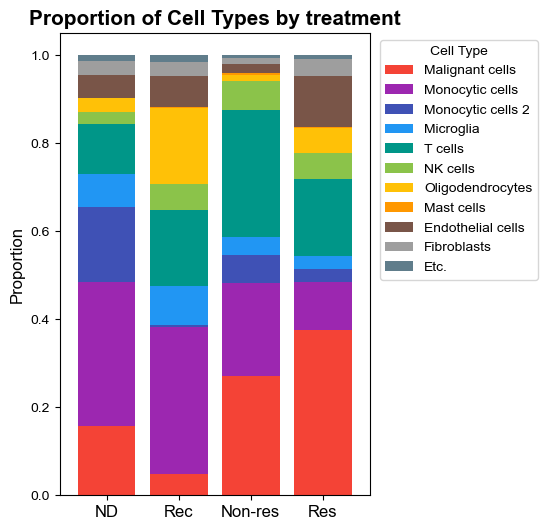

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
df = pd.DataFrame({
    'cell_type': adata.obs['cell_type'],
    'hue': adata.obs['treatment_2'],
})

# df = df[df['hue'].isin(['Res', 'Non-res'])]
# df['hue'] = df['hue'].cat.remove_unused_categories()

# 데이터프레임을 'cell_type'과 'hue'로 그룹화하여 비율 계산
count_df = df.groupby(['hue', 'cell_type']).size().unstack(fill_value=0)

# 각 hue 그룹의 총합을 구하고 비율 계산
proportions_df = count_df.div(count_df.sum(axis=1), axis=0)
hue_order = ['ND', 'Rec', 'Non-res', 'Res']



# 스택된 막대 그래프 그리기
proportions_df.loc[hue_order].plot(
    kind='bar',
    stacked=True,
    figsize=(4, 6),
    color = adata.uns['cell_type_colors'],
    width = 0.8
)

# 그래프 꾸미기
plt.title('Proportion of Cell Types by treatment', fontsize=15, fontweight='bold')
plt.xticks(rotation=0, fontsize = 12)
plt.xlabel('')
plt.ylabel('Proportion', fontsize = 12)
plt.legend(title='Cell Type', loc = 'upper left', bbox_to_anchor = (1.01, 1))
plt.show()
